#Nia Febriyanti
###Data Science Fellowship Batch 5 - IYKRA
1. Data Preparation
    - Importing Library
    - Read the dataset from github source

2. Answering the questions
    - Question 1
    - Question 2
    - Question 3
    - Question 4
    - Question 5

##Data Preparation

In [52]:
#Import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
#Read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv")
display(data.shape)
data.head()

(20, 44)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


> 1. Whether this data is clean?


In [54]:
#show the percentage of null values
data.isnull().sum()/data.shape[0]*100

Team                             0.0
category                         0.0
general_league_position          0.0
finance _live_games_televised    0.0
finance _tv_revenue              0.0
general_matches_played           0.0
general_won                      0.0
general_draw                     0.0
general_lost                     0.0
attack_scored                    0.0
defence_goals_conceeded          0.0
general_goal_difference          0.0
general_points                   0.0
general_squad_size               0.0
general_squad_average_age        0.0
general_squad_foreigners         0.0
finance _team_market             0.0
finance _market_average          0.0
attack_passes                    0.0
attack_passes_through            0.0
attack_passes_long               0.0
attack_passes_back               0.0
attack_crosses                   0.0
attack_corners_taken             0.0
attack_shots                     0.0
attack_shots_on_target           0.0
attack_goals_headed              0.0
a

The data is totally clean

> 2. How is the point distribution of the epl team? and which team is an anomaly?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



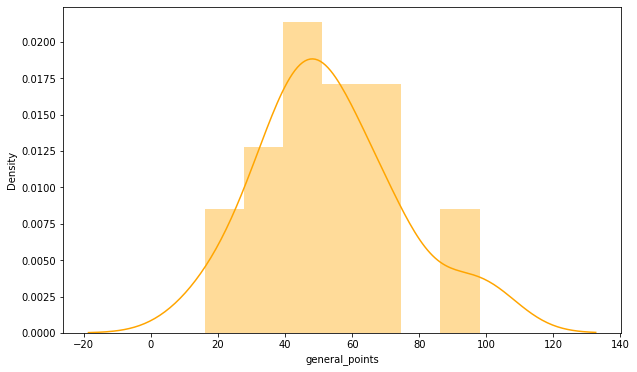

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(data["general_points"], color='orange', kde_kws={'shade':False}, hist=True, bins = 7)
plt.show()

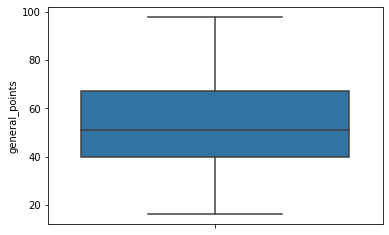

In [56]:
sns.boxplot(data=data, y='general_points')

Based on the distribution chart, it shows that the general point is well distributed like normal.

It supports also with boxplot that there is no outlier. Therefore, the data is quite good with no anomally

> 3. Which team has the best attack?


In [57]:
#get the team and attack score variable
Q3 = data[['Team','attack_scored']]

#show the bar
fig = px.bar(Q3.sort_values('attack_scored', ascending=True), x='attack_scored', y='Team',
             title='Attack Score Each Team', orientation='h')

fig.update_traces(marker_color='#ff0000', opacity=0.7, textposition='outside')
fig.update_layout(xaxis_range=[10,100])
fig.show()

The chart shows that Manchester City is the best team in terms of attack scored

> 4. Which team has the best defence?


There are eight different defences in the dataset and it shows that the more score in defence the team has is better.

In [58]:
#replace punctuation
data['defence_clearances'] = data['defence_clearances'].str.replace(',','')
#change datatypes into integer
data['defence_clearances'] = data['defence_clearances'].astype('int64')

In [59]:
#calculate data
data['all_defence'] = data['defence_blocks'] + data['defence_clearances'] + data['defence_clearances_headed'] + data['defence_goals_conceeded'] +\
data['defence_interceptions'] + data['defence_penalty_conceeded'] + data['defence_saves'] + data['defence_tackles'] + data['defence_tackles_last_man']

Q4 = data[['Team','all_defence']]
Q4.head()

,Team,all_defence
0,Manchester City,1866
1,Liverpool,2059
2,Chelsea,2093
3,Tottenham,2413
4,Arsenal,2498


In [60]:
#show the bar
fig = px.bar(Q4.sort_values('all_defence', ascending=True), x='all_defence', y='Team',
             title='Team with Defence', orientation='h')

fig.update_traces(marker_color='mediumpurple', opacity=0.7, textposition='outside')
fig.update_layout(xaxis_range=[1700,3200])
fig.show()

The chart shows that Newcastle is the best team in terms of defence scored

> 5. Which team is good in financial aspect?

In [62]:
#create treemap
Q5 = data[['Team','category','finance _tv_revenue']]

fig = px.treemap(Q5, path = ['Team'], values='finance _tv_revenue', color='finance _tv_revenue')
fig.show()

> 6. Which team is good in financial aspect in each category?

In [63]:
#create treemap for each category
Q5 = data[['Team','category','finance _tv_revenue']]

fig = px.treemap(Q5, path=['category','Team'], values='finance _tv_revenue', color='finance _tv_revenue')
fig.show()



*   Liverpool is the team of all teams which has the best financial aspect.
*   If I categorize by category, the best financial aspect as follow:
    - Champions League is Everton
    - Champions League Qualification is Liverpool
    - Europa League is Cardiff
    - Europa League Qualification is Chelsea
    - Relegated is Manchester United
    - No UFA competition is Wolverhampton




